In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#l'idée est de faire un challenge Makeover Monday. J'ai choisi celui autour de la série Game of throne
#source = https://data.world/datasaurusrex/game-of-thones-deaths

In [3]:
got = pd.read_excel (r'makeovermonday-2019w27/game-of-thones-deaths.xlsx')
got.columns=got.iloc[0]
got.drop(index=0, inplace=True)
got['Epi_seas'] = 'S'+got["Season"].map(str)+'E'+got["Episode"].map(str)
got.tail()

,Allegiance,Death No.,Episode,Killer,Killers House,Location,Method,Name,Season,Epi_seas
2220,None,2207,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,S8E5
2221,None,2208,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,S8E5
2222,None,2209,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,S8E5
2223,None,2210,5,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,8,S8E5
2224,House Targaryen,2224,6,Jon Snow,House Stark,King's Landing,Knife,Daenerys Targaryen,8,S8E6


## nb de morts par saison

Text(0, 0.5, 'Nb de morts')

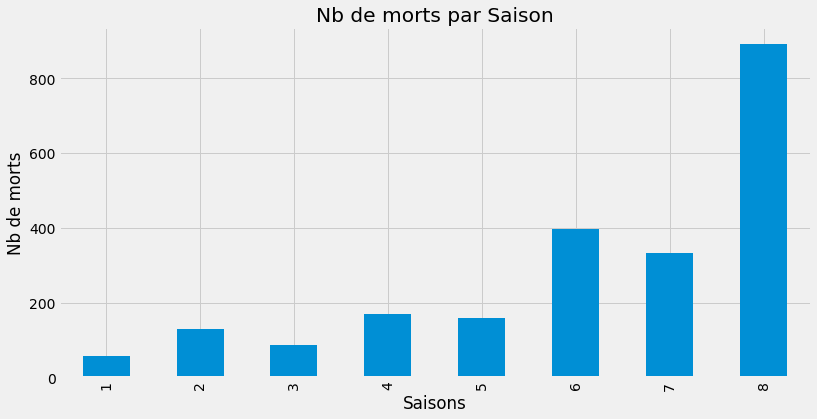

In [4]:
got_death_season=got.groupby(["Season"]).agg({'Death No.':'count'})

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 6))

got_death_season['Death No.'].plot.bar()

plt.title('Nb de morts par Saison')
plt.xlabel('Saisons')
plt.ylabel('Nb de morts')

## Episode le plus meutrier par saison
pour identifier l'épisode par saison le plus meutrier j'ai choisi créer un df puis un pivot sur le nb de morts par saison par episode 


In [5]:
got_death_epi_season=got[['Season','Episode','Allegiance']].groupby(['Season','Episode']).agg('count')
got_death_epi_season= got_death_epi_season.pivot_table(index='Episode' ,columns=['Season'] , values='Allegiance')

got_death_epi_season

Season,1,2,3,4,5,6,7,8
Episode,,,,,,,,
1,7.0,7.0,1.0,5.0,2.0,8.0,54.0,6.0
2,3.0,1.0,1.0,6.0,8.0,7.0,29.0,1.0
3,NaN,8.0,4.0,11.0,5.0,10.0,23.0,35.0
4,1.0,3.0,11.0,1.0,48.0,18.0,205.0,5.0
5,17.0,4.0,4.0,16.0,2.0,8.0,4.0,844.0
6,5.0,12.0,7.0,7.0,1.0,NaN,9.0,1.0
7,5.0,15.0,NaN,7.0,2.0,1.0,10.0,NaN
8,11.0,NaN,6.0,12.0,23.0,8.0,NaN,NaN
9,6.0,72.0,45.0,86.0,58.0,133.0,NaN,NaN


j'ai choisi de créer un graph de type "scatter" plot où je m'assure que les point aient une taille proportionnelle au nb de morts

Text(0, 0.5, 'Episodes')

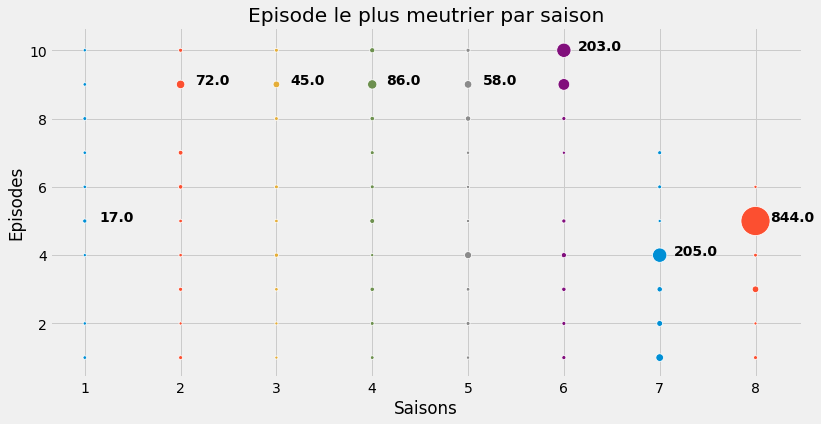

In [6]:
plt.figure(figsize=(12,6))

for x in got_death_epi_season:
    ax = sns.scatterplot(x,
                    y=[d for d in got_death_epi_season.index],
                    size=got_death_epi_season[x],
                    sizes=(10, got_death_epi_season[x].max()),
                    legend=False,
                    label=x,
                    cmap="plasma")
    for z in got_death_epi_season.index:
        if got_death_epi_season[x][z] == got_death_epi_season[x].max():
            ax.text(x+0.15, z, got_death_epi_season[x][z], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('Episode le plus meutrier par saison')
plt.xlabel('Saisons')
plt.ylabel('Episodes')

## Maisons les plus meutrières envers quelle allégiance

In [7]:
got_house=got[['Allegiance','Death No.','Epi_seas','Killers House']]
got_house =got_house.groupby(['Allegiance','Killers House']).agg({'Death No.':'count'})

got_house = got_house.pivot_table(index='Allegiance',columns='Killers House')
got_house = got_house.xs('Death No.', axis=1, drop_level=True)
got_house.head()

Killers House,Brotherhood Without Banners,Dothraki,Faceless Men,Free Folk,House Arryn,House Baelish,House Baratheon of Dragonstone,House Baratheon of King's Landing,House Bolton,House Clegane,...,Lord of Light,Night's Watch,None,Sand Snakes,Smallfolk,Sons of the Harpy,The Masters,Unknown,Warlocks of Qarth,White Walkers
Allegiance,,,,,,,,,,,,,,,,,,,,,
Brotherhood Without Banners,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
Children of the Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Dothraki,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faceless Men,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Faith Militant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


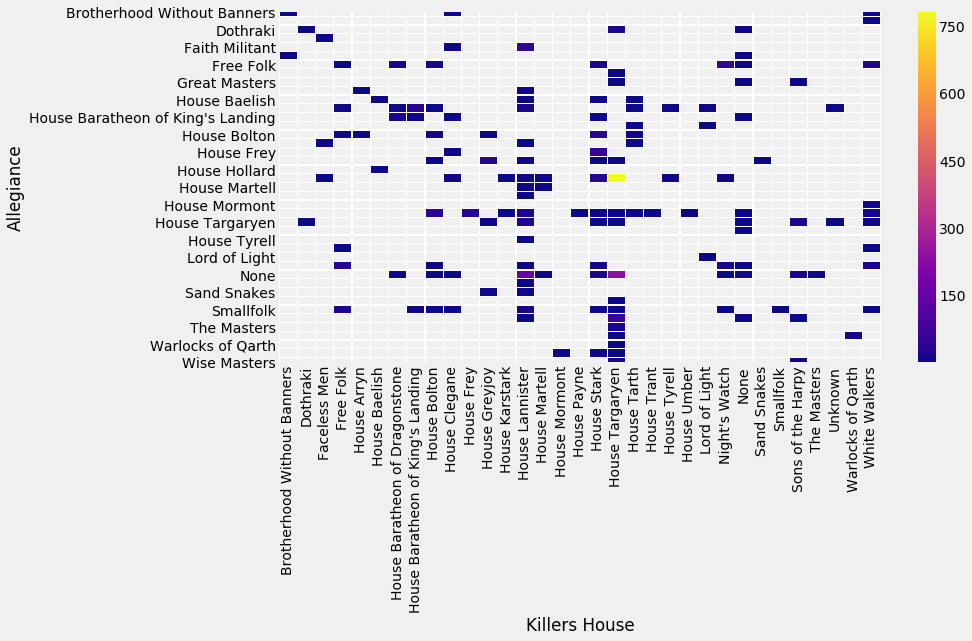

In [8]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(got_house, annot=False,  linewidths=.2, ax=ax, cmap="plasma")

## Nb de morts par type d'armes
J'identifie dans un premiers temps le top dix des armes les plus employées que je mets dans une liste

In [9]:
#got_weapons=got[['Death No.','Method','Season']].groupby(['Method']).agg({'Death No.':'count'}).sort_values('Death No.',ascending=False).nlargest(10,'Death No.')
list_weapons = [x for x in got[['Death No.','Method','Season']].groupby(['Method']).agg('count').sort_values('Death No.',ascending=False).nlargest(10,'Death No.').index]
death_weapons= got[got['Method'].isin(list_weapons)].groupby(['Method','Season']).agg('count')
death_weapons = death_weapons.pivot_table(index='Method',columns=['Season'],values ='Allegiance')
death_weapons

Season,1,2,3,4,5,6,7,8
Method,,,,,,,,
Arakh,1.0,NaN,6.0,1.0,7.0,1.0,10.0,18.0
Arrow,1.0,8.0,11.0,14.0,1.0,44.0,11.0,5.0
Axe,NaN,5.0,NaN,20.0,6.0,5.0,7.0,5.0
Dragonfire (Dragon),NaN,1.0,1.0,2.0,15.0,12.0,182.0,773.0
Flaming arrow,NaN,20.0,NaN,15.0,NaN,NaN,NaN,NaN
Knife,4.0,19.0,29.0,10.0,32.0,11.0,8.0,6.0
Poison,1.0,1.0,NaN,1.0,4.0,NaN,56.0,NaN
Spear,3.0,2.0,8.0,7.0,22.0,13.0,12.0,14.0
Sword,30.0,33.0,13.0,52.0,51.0,70.0,24.0,49.0


In [10]:
#Je crée un list vide qui contiendra les morts par armes 
Row_list =[] 
# je fais un itération par ligne de la df où j'utilise iloc pour accéder aux valeurs
for i in range((death_weapons.shape[0])):   
    Row_list.append(list(death_weapons.iloc[i, :]))   

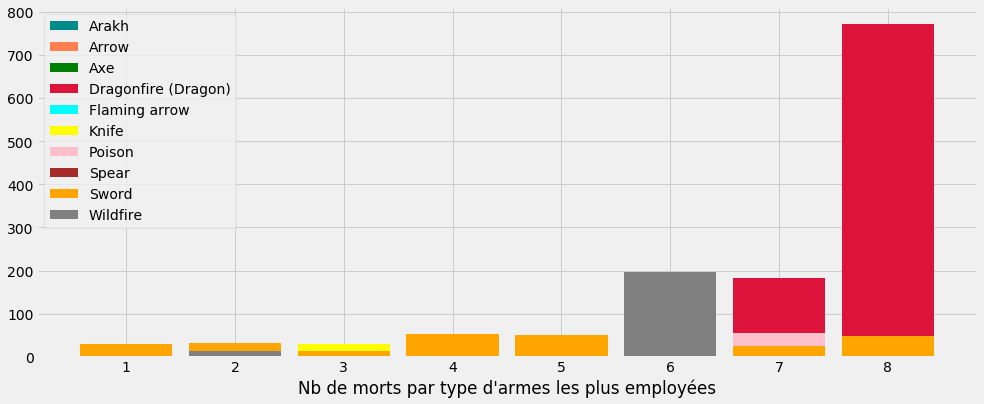

In [11]:
#je crée ensuite mon graph de type histogramme empilé avec une boucle for
plt.figure(figsize=(15,6))
barWidth = 0.85

season_list = death_weapons.columns.tolist() #pour obtenir le n°de saison sur l'axe des abscisses
plt.xticks(season_list, season_list)
colors=['darkcyan', 'coral', 'green', 'crimson', 'cyan','yellow','pink','brown','orange','grey']
for row,c in zip(range(10),colors):
    plt.bar(season_list,Row_list[row],width=barWidth, color=c)
plt.xlabel("Nb de morts par type d'armes les plus employées")
plt.legend([armes for armes in death_weapons.index],loc=2)


## Analyse de lieux mortels

In [25]:
list_killers = [x for x in got[['Death No.','Location','Season']].groupby(['Location']).agg('count').sort_values('Death No.',ascending=False).nlargest(10,'Death No.').index]
list_killers= got[got['Location'].isin(list_killers)].groupby(['Location','Season']).agg('count')
#list_killers = list_killers.pivot_table(index='Killer',columns=['Season'],values ='Allegiance')
#list_killers['Total of death']=list_killers.sum(axis=1)
#list_killers=list_killers.sort_values('Total of death', ascending=False)
list_killers = list_killers.pivot_table(index='Season',columns=['Location'],values ='Allegiance')
list_killers

Location,Beyond the Wall,Castle Black,King's Landing,Meereen,Riverlands,Roseroad,The Narrow Sea,The Twins,The Wall,Winterfell
Season,,,,,,,,,,
1,2.0,2.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,3.0,NaN,83.0,NaN,8.0,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,1.0,NaN,4.0,NaN,NaN,32.0,6.0,NaN
4,52.0,54.0,8.0,5.0,8.0,NaN,NaN,NaN,12.0,NaN
5,NaN,4.0,2.0,102.0,NaN,NaN,NaN,NaN,NaN,8.0
6,8.0,6.0,203.0,29.0,8.0,NaN,NaN,3.0,NaN,113.0
7,9.0,NaN,3.0,NaN,NaN,207.0,29.0,54.0,8.0,1.0
8,NaN,NaN,845.0,NaN,NaN,NaN,6.0,NaN,NaN,35.0


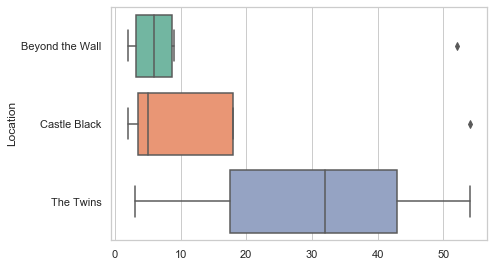

In [26]:
sns.set(style="whitegrid")
location=list_killers[['Beyond the Wall','Castle Black','The Twins']]
ax = sns.boxplot(data=location, orient="h", palette="Set2")

## TOP personnages les plus meurtriers
Je cherche les 3 personnages les plus meurtriers toutes saisons confondues

In [20]:
list_killers = [x for x in got[['Death No.','Killer','Season']].groupby(['Killer']).agg('count').sort_values('Death No.',ascending=False).nlargest(10,'Death No.').index]
list_killers= got[got['Killer'].isin(list_killers)].groupby(['Killer','Season']).agg('count')
#list_killers = list_killers.pivot_table(index='Killer',columns=['Season'],values ='Allegiance')
#list_killers['Total of death']=list_killers.sum(axis=1)
#list_killers=list_killers.sort_values('Total of death', ascending=False)
list_killers = list_killers.pivot_table(index='Season',columns=['Killer'],values ='Allegiance')
list_killers

Killer,Arya Stark,Bolton soldier,Cersei Lannister,Daenerys Targaryen,Grey Worm,Jon Snow,Night's Watch brother,Sons of the Harpy agent,Stark Soldier,Wight
Season,,,,,,,,,,
1,2.0,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,NaN
3,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,2.0,NaN,12.0,39.0,NaN,NaN,NaN
5,3.0,NaN,NaN,18.0,11.0,2.0,NaN,27.0,NaN,20.0
6,3.0,47.0,198.0,27.0,2.0,24.0,NaN,11.0,15.0,6.0
7,55.0,NaN,1.0,182.0,6.0,NaN,NaN,NaN,NaN,4.0
8,1.0,NaN,NaN,773.0,13.0,9.0,NaN,NaN,23.0,24.0


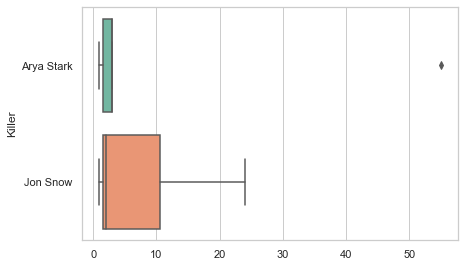

In [24]:
sns.set(style="whitegrid")
killers=list_killers[['Arya Stark','Jon Snow']]
ax = sns.boxplot(data=killers, orient="h", palette="Set2")